**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: XXX XXX,   **Date**: DD.MM.YYYY

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accommodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas. 

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [311]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [312]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">

...
</div>

<div class="alert alert-success">

    
Which columns contain missing values, commonly NaN? Hint: Consider the 'count' row of `describe`.
</div>

<div class="alert alert-warning">

- Mainly the deck of accommodation information are missing. Out of 891 rows (people) for only 203 the deck of accommodation is provided. In total 688 are missing
- Age information are also missing. Out of 891 rows (people) only 714 are providing the age value. 177 are missing
- For 2 people the port of embarkation is not given.
    
</div>

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [313]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

<div class="alert alert-warning">

- There are decks from A-G
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4

</div>

<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**: 

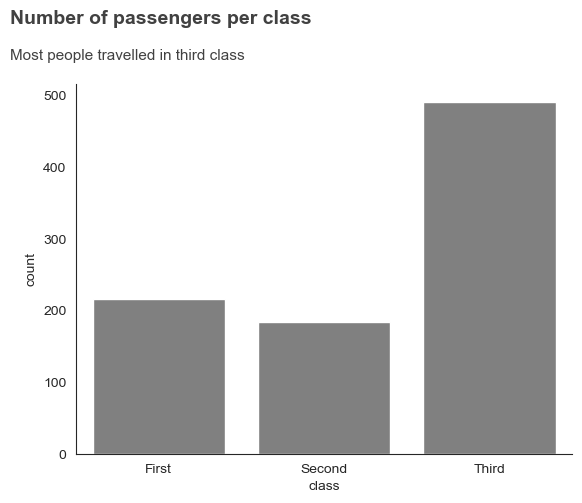

In [314]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Finish the histogram below. 
- Set an appropriate number of bins and add a subtitle that tells about one finding. 
- Can you detect different price groups?
</div>

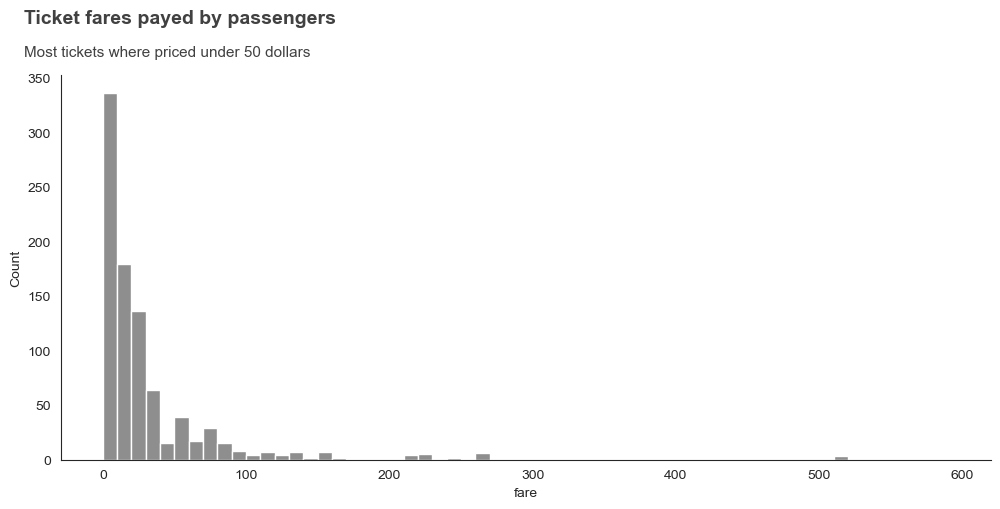

In [315]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=titanic["fare"], color="dimgray", bins=np.arange(0,600,10))
ax.text(x=-55, y=400, s="Ticket fares payed by passengers", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-55, y=370, s="Most tickets where priced under 50 dollars", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart (= two 1D-histograms, explore more if you want). Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

In [316]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

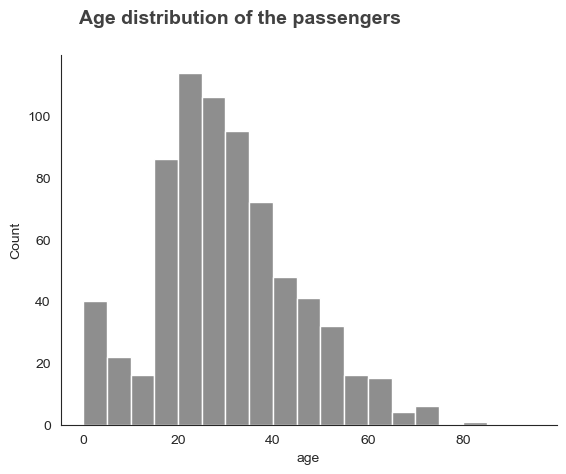

In [317]:
sns.set_style("white")

ax = sns.histplot(data=titanic["age"], color="dimgray", bins=np.arange(0,100,5))

ax.text(x=-.9, y=130, s="Age distribution of the passengers", fontsize=14, fontweight='semibold', color='#414141')
sns.despine()

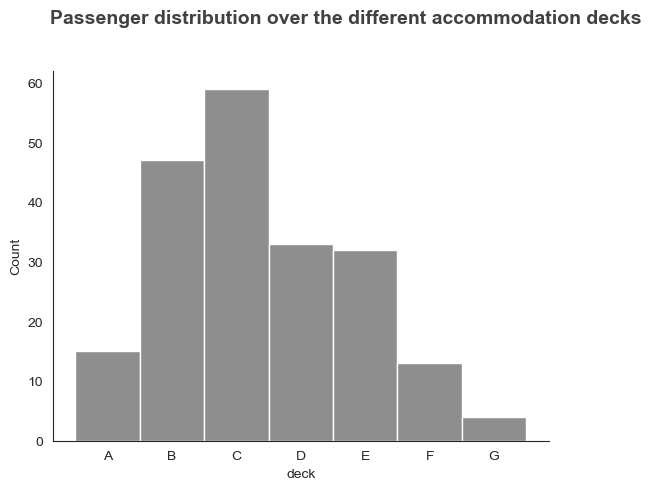

In [318]:
p2 = sns.histplot(data=titanic["deck"], color="dimgray")
p2.text(x=-.9, y=70, s="Passenger distribution over the different accommodation decks", fontsize=14, fontweight='semibold', color='#414141')
sns.despine()

<div class="alert alert-info">
    
## 4. Who did survive?
</div>

For each question below, create a chart in the axes above that helps you answer the questions. It is ok to stick to the [plots implemented in seaborn](https://seaborn.pydata.org/api.html). Some plots, like stacked bar charts, require more work.

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children? Hint: You can add another dimension to you `displot` or `countplot` by coloring bars with 'hue=column_name'.
</div>

'0.12.2'

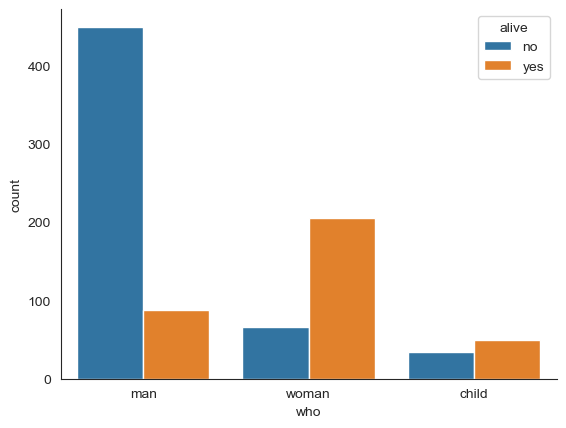

In [319]:
#amount of surviors for each type and amount of dead people per group
#woman
woman = titanic.loc[titanic['who'] == "woman"]
deadWoman = woman.loc[woman['survived'] == 0].survived.count()
aliveWoman = woman.loc[woman['survived'] == 1].survived.count()

#men
man = titanic.loc[titanic['who'] == "man"]
deadMan = man.loc[man['survived'] == 0].survived.count()
aliveMan = man.loc[man['survived'] == 1].survived.count()

#children
children = titanic.loc[titanic['who'] == "child"]
deadChildren = children.loc[children['survived'] == 0].survived.count()
aliveChildren = children.loc[children['survived'] == 1].survived.count()

#sns.histplot(data=woman['alive'])
#sns.displot(data=titanic, x='who', hue='alive', kind='hist', multiple = 'stack')
#sns.histplot(data=children['alive'])
sns.countplot(data=titanic, x="who", hue="alive")
sns.despine()
sns.__version__

<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

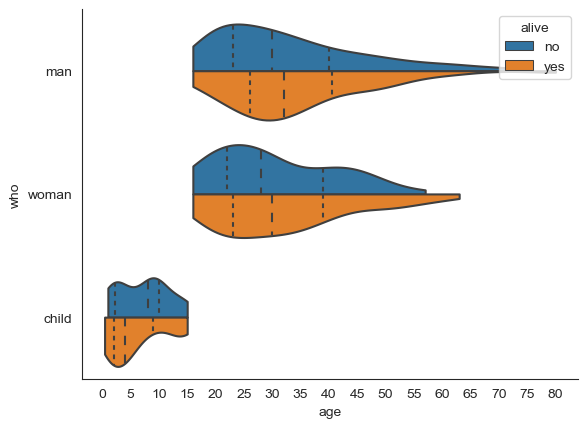

In [320]:
filtered = titanic.dropna(subset=['age'])
#sns.displot(data=titanic, x='age', hue='alive', kind='hist', multiple = 'stack', rug=True)

sns.violinplot(data=filtered, x="age", y="who", hue="alive", split=True, inner="quart", cut=0)
plt.xticks(range(0, int(filtered['age'].max()) + 1, 5))
sns.despine()

#filtered.describe(include="all")


**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [321]:
titanic['alive'].value_counts() / len(titanic)

alive
no     0.616162
yes    0.383838
Name: count, dtype: float64

We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [322]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

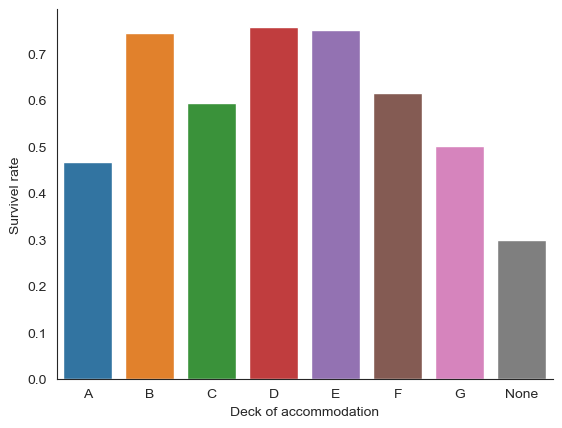

In [323]:
#filtered = titanic[titanic['survived'] == 1]['deck_all'].value_counts() / len(titanic)
survivors = titanic[titanic['survived'] == 1]
surviveRates = survivors['deck_all'].value_counts() / titanic['deck_all'].value_counts()
#survivalRateC = len(survivors[survivors['deck_all'] == 'C'].value_counts()) / len(titanic[titanic['deck_all'] == 'C'])
#survivalRateC
ax = sns.barplot(x=surviveRates.index, y=surviveRates )
ax.set(xlabel='Deck of accommodation', ylabel='Survivel rate')
sns.despine()

#survivel rate per deck

<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says: 
> It's so unfair. Only c could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source (not necessary to read): [Essay terms explained by University of Leicester](https://www2.le.ac.uk/projects/oer/oers/ssds/oers/writing-skills/writingskillscg.pdf)

</div>



### Answer:
<div class="alert alert-warning">

- The ticks do not have a standardized price. 
- That means a first class ticket can be even cheaper than a third class ticket in some cases.
- Therefore tickets are not only restricted to people with high income.   
- Between age 20 and 50 most first class tickets got sold. Between age 15 and 50 the first class tickets are evenly distributed as seen in the joint plot below.
- If we have a look at the ratio between first class tickets vs other tickets per age group. We can see an increase in the ratio for ages higher then 35
- Only kids below the age of 15 got nearly no first class ticket
- The reason for the low amount of first class tickets in the kids age group could be that they do not pay for there tickets them self. Usually the family of the kid pays for the kids ticket.
- In this time the father was usually the main source of financial income that means the father has to pay for his wife, kids and him self at the same time which does not allow him to buy a first class ticket.
- If he would travel on his own it would be easier for him to afford a first class ticket
- I assume this is usually the case for people in higher age groups (elderly people)
- Which would reason the higher first class ticker ratio for the older age groups
</div>

### Supporting charts:

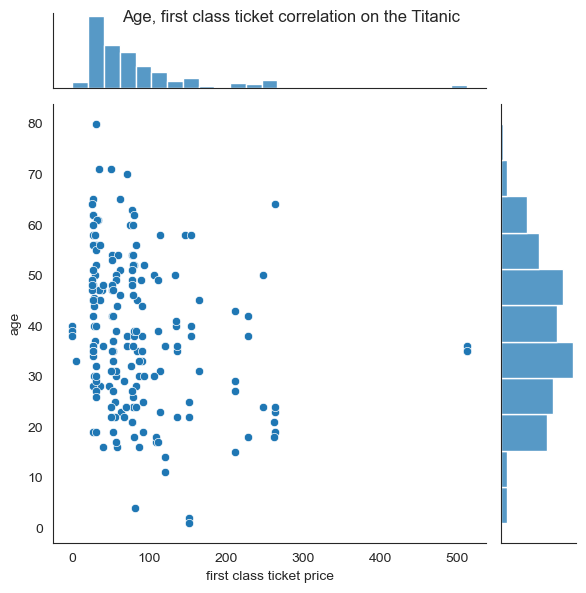

In [332]:
# suggestions: countplot, displot, histplot, scatterplot, boxplot, jointplot
#sns.barplot(data=titanic, x='class', y='age')
firstClass = titanic[titanic['class'] == 'First']
ax = sns.jointplot(data=titanic[titanic['class'] == 'First'], x='fare', y='age')
ax.set_axis_labels('first class ticket price','age')
ax.fig.suptitle('Age, first class ticket correlation on the Titanic')
sns.despine()


The joint plot shows that the prices for first class tickets can highly differ. Also how the first class tickets are distributed over the different age groups can be concluded.


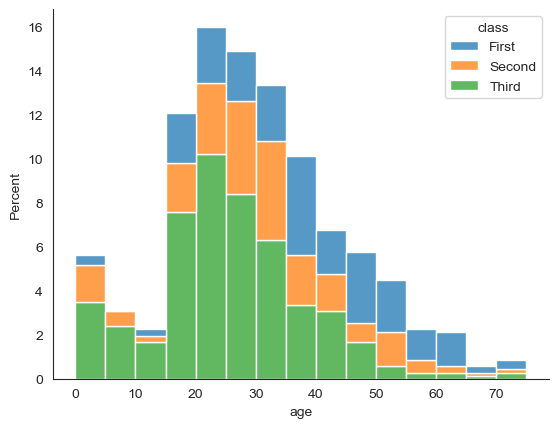

In [325]:
sns.histplot(data=titanic, x='age', stat='percent', hue='class', multiple="stack", bins=np.arange(0,80,5))
sns.despine()

c:\Users\Erik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


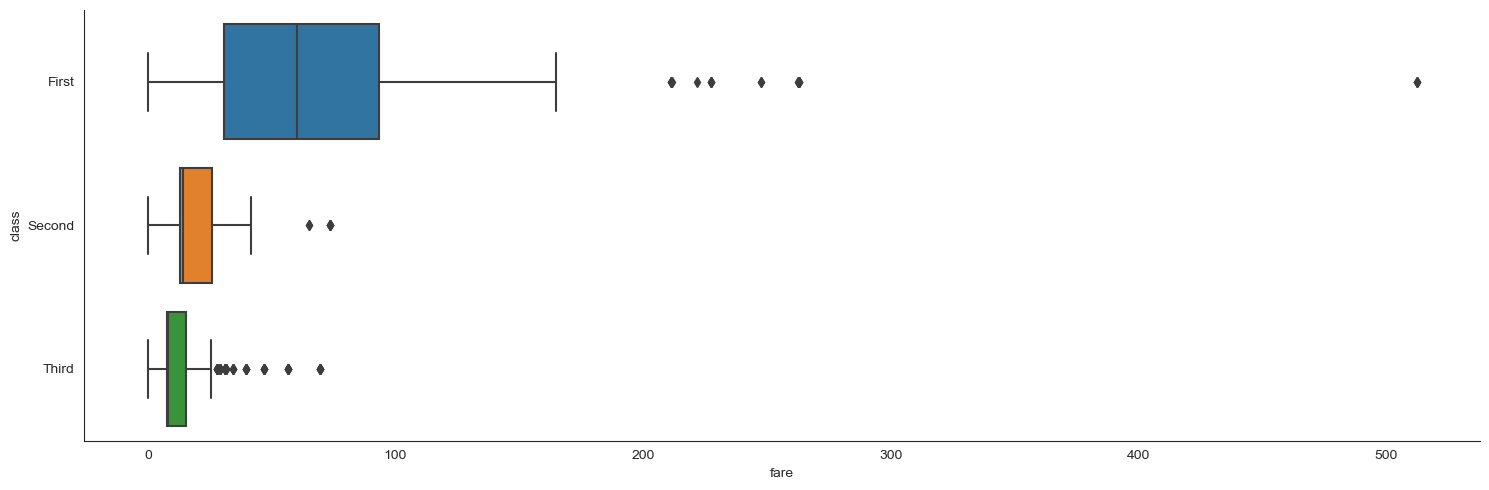

In [326]:
sns.catplot(data=titanic, x='fare', y='class', kind='box', height=5, aspect=3)
sns.despine()

<Axes: xlabel='age', ylabel='Percent'>

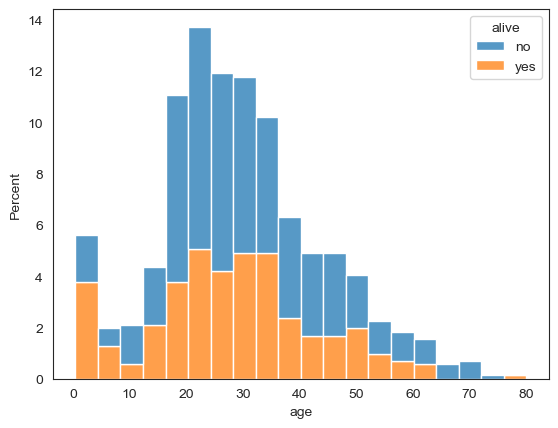

In [327]:
sns.histplot(titanic, x='age', hue='alive',stat='percent',multiple='stack')